In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/madfhantr.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isna().sum().sum()

149

In [6]:
df.shape

(614, 13)

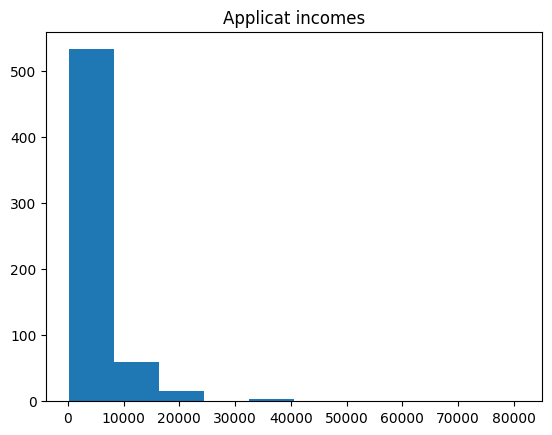

In [10]:
plt.hist(df['ApplicantIncome'])
plt.title('Applicat incomes')
plt.show()

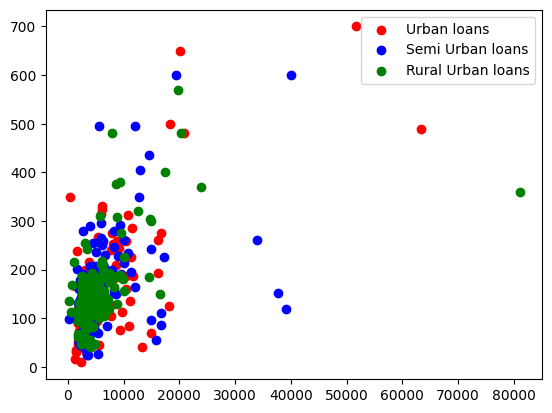

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
urban_loans = df[df['Property_Area']=='Urban']
rural_loans = df[df['Property_Area']=='Rural']
semi_loans = df[df['Property_Area']=='Semiurban']

plt.scatter(urban_loans['ApplicantIncome'], urban_loans['LoanAmount'], c='red', label="Urban loans")
plt.scatter(semi_loans['ApplicantIncome'], semi_loans['LoanAmount'], c='blue', label="Semi Urban loans")
plt.scatter(rural_loans['ApplicantIncome'], rural_loans['LoanAmount'], c='green', label="Rural Urban loans")
plt.legend()
plt.show()
df['Property_Area'].unique()

In [36]:
#preprocessing of the columns
from sklearn.preprocessing import LabelEncoder
import numpy as np

lb = LabelEncoder()
df = pd.read_csv('/content/madfhantr.csv')

df['Gender'].unique()
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)
df['Married'] = np.where(df['Married']=='Yes', 1, 0)
df['Loan_Status'] = np.where(df['Loan_Status']=="Y", 1, 0)
df['Education'] = lb.fit_transform(df['Education'])
df['Self_Employed'] = lb.fit_transform(df['Self_Employed'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<ipython-input-40-61e2ee171a05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

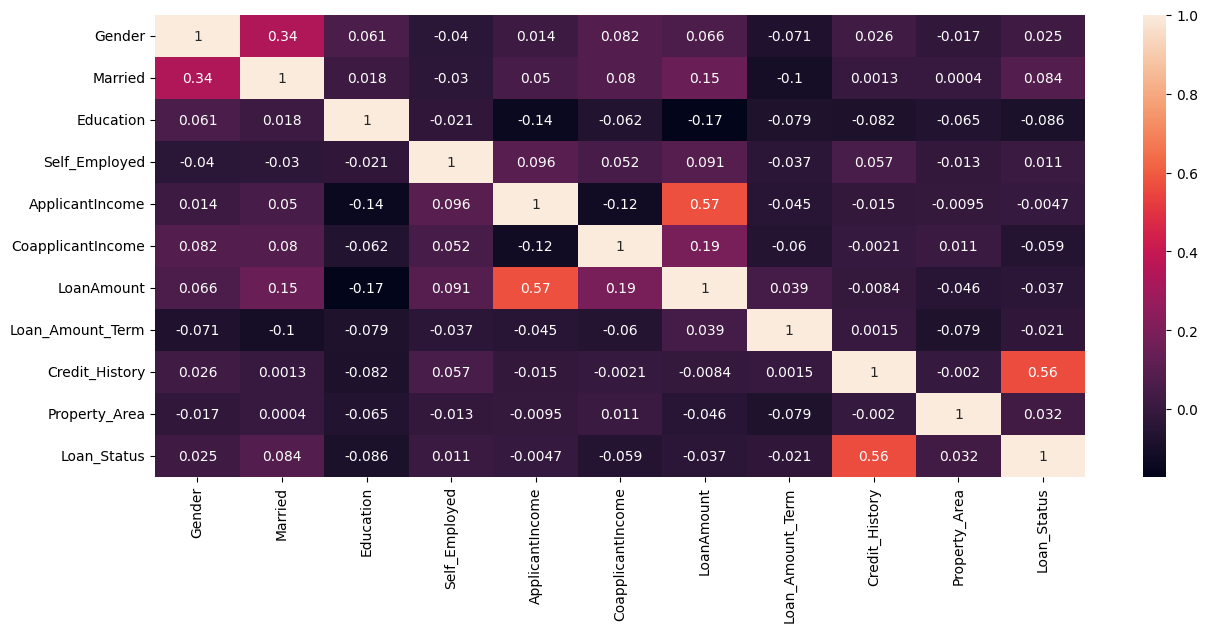

In [40]:
cor = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(cor, annot=True)

In [79]:
X = df[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']]
Y = df['Loan_Status']
X['LoanAmount'].fillna(X['LoanAmount'].mean, inplace=True)
X['Credit_History'].fillna(0, inplace=True)
X['CoapplicantIncome'] = X['CoapplicantIncome'].apply(np.int64)
X['Credit_History'] = X['Credit_History'].apply(np.int64)
X['LoanAmount'] = pd.to_numeric(df['LoanAmount'])
X['LoanAmount'].fillna(X['LoanAmount'].mean(), inplace=True)
X.dtypes

<ipython-input-79-b2bdfa9bffcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LoanAmount'].fillna(X['LoanAmount'].mean, inplace=True)
<ipython-input-79-b2bdfa9bffcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Credit_History'].fillna(0, inplace=True)
<ipython-input-79-b2bdfa9bffcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CoapplicantIncome'] = X['Coapplic

Gender                 int64
Married                int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Credit_History         int64
Property_Area          int64
dtype: object

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=25)

In [81]:
model = dt.fit(x_train, y_train)

In [82]:
y_pred = model.predict(x_test)

In [83]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.6038961038961039


In [85]:
X.columns
gender = input("Enter Gender: ")
Married = input("Enter Married: ")
Education = input("Enter Education: ")
Self_Employed = input("Enter Self_Employed: ")
ApplicantIncome = input("Enter ApplicantIncome: ")
CoapplicantIncome = input("Enter CoapplicantIncome: ")
LoanAmount = input("Enter LoanAmount: ")
Credit_History = input("Enter Credit_History: ")
Property_Area = input("Enter Property_Area: ")

data = [gender, Married, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History,Property_Area]
model.predict([data])

Enter Gender: 1
Enter Married: 1
Enter Education: 1
Enter Self_Employed: 1
Enter ApplicantIncome: 6000
Enter CoapplicantIncome: 1000
Enter LoanAmount: 600
Enter Credit_History: 1
Enter Property_Area: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

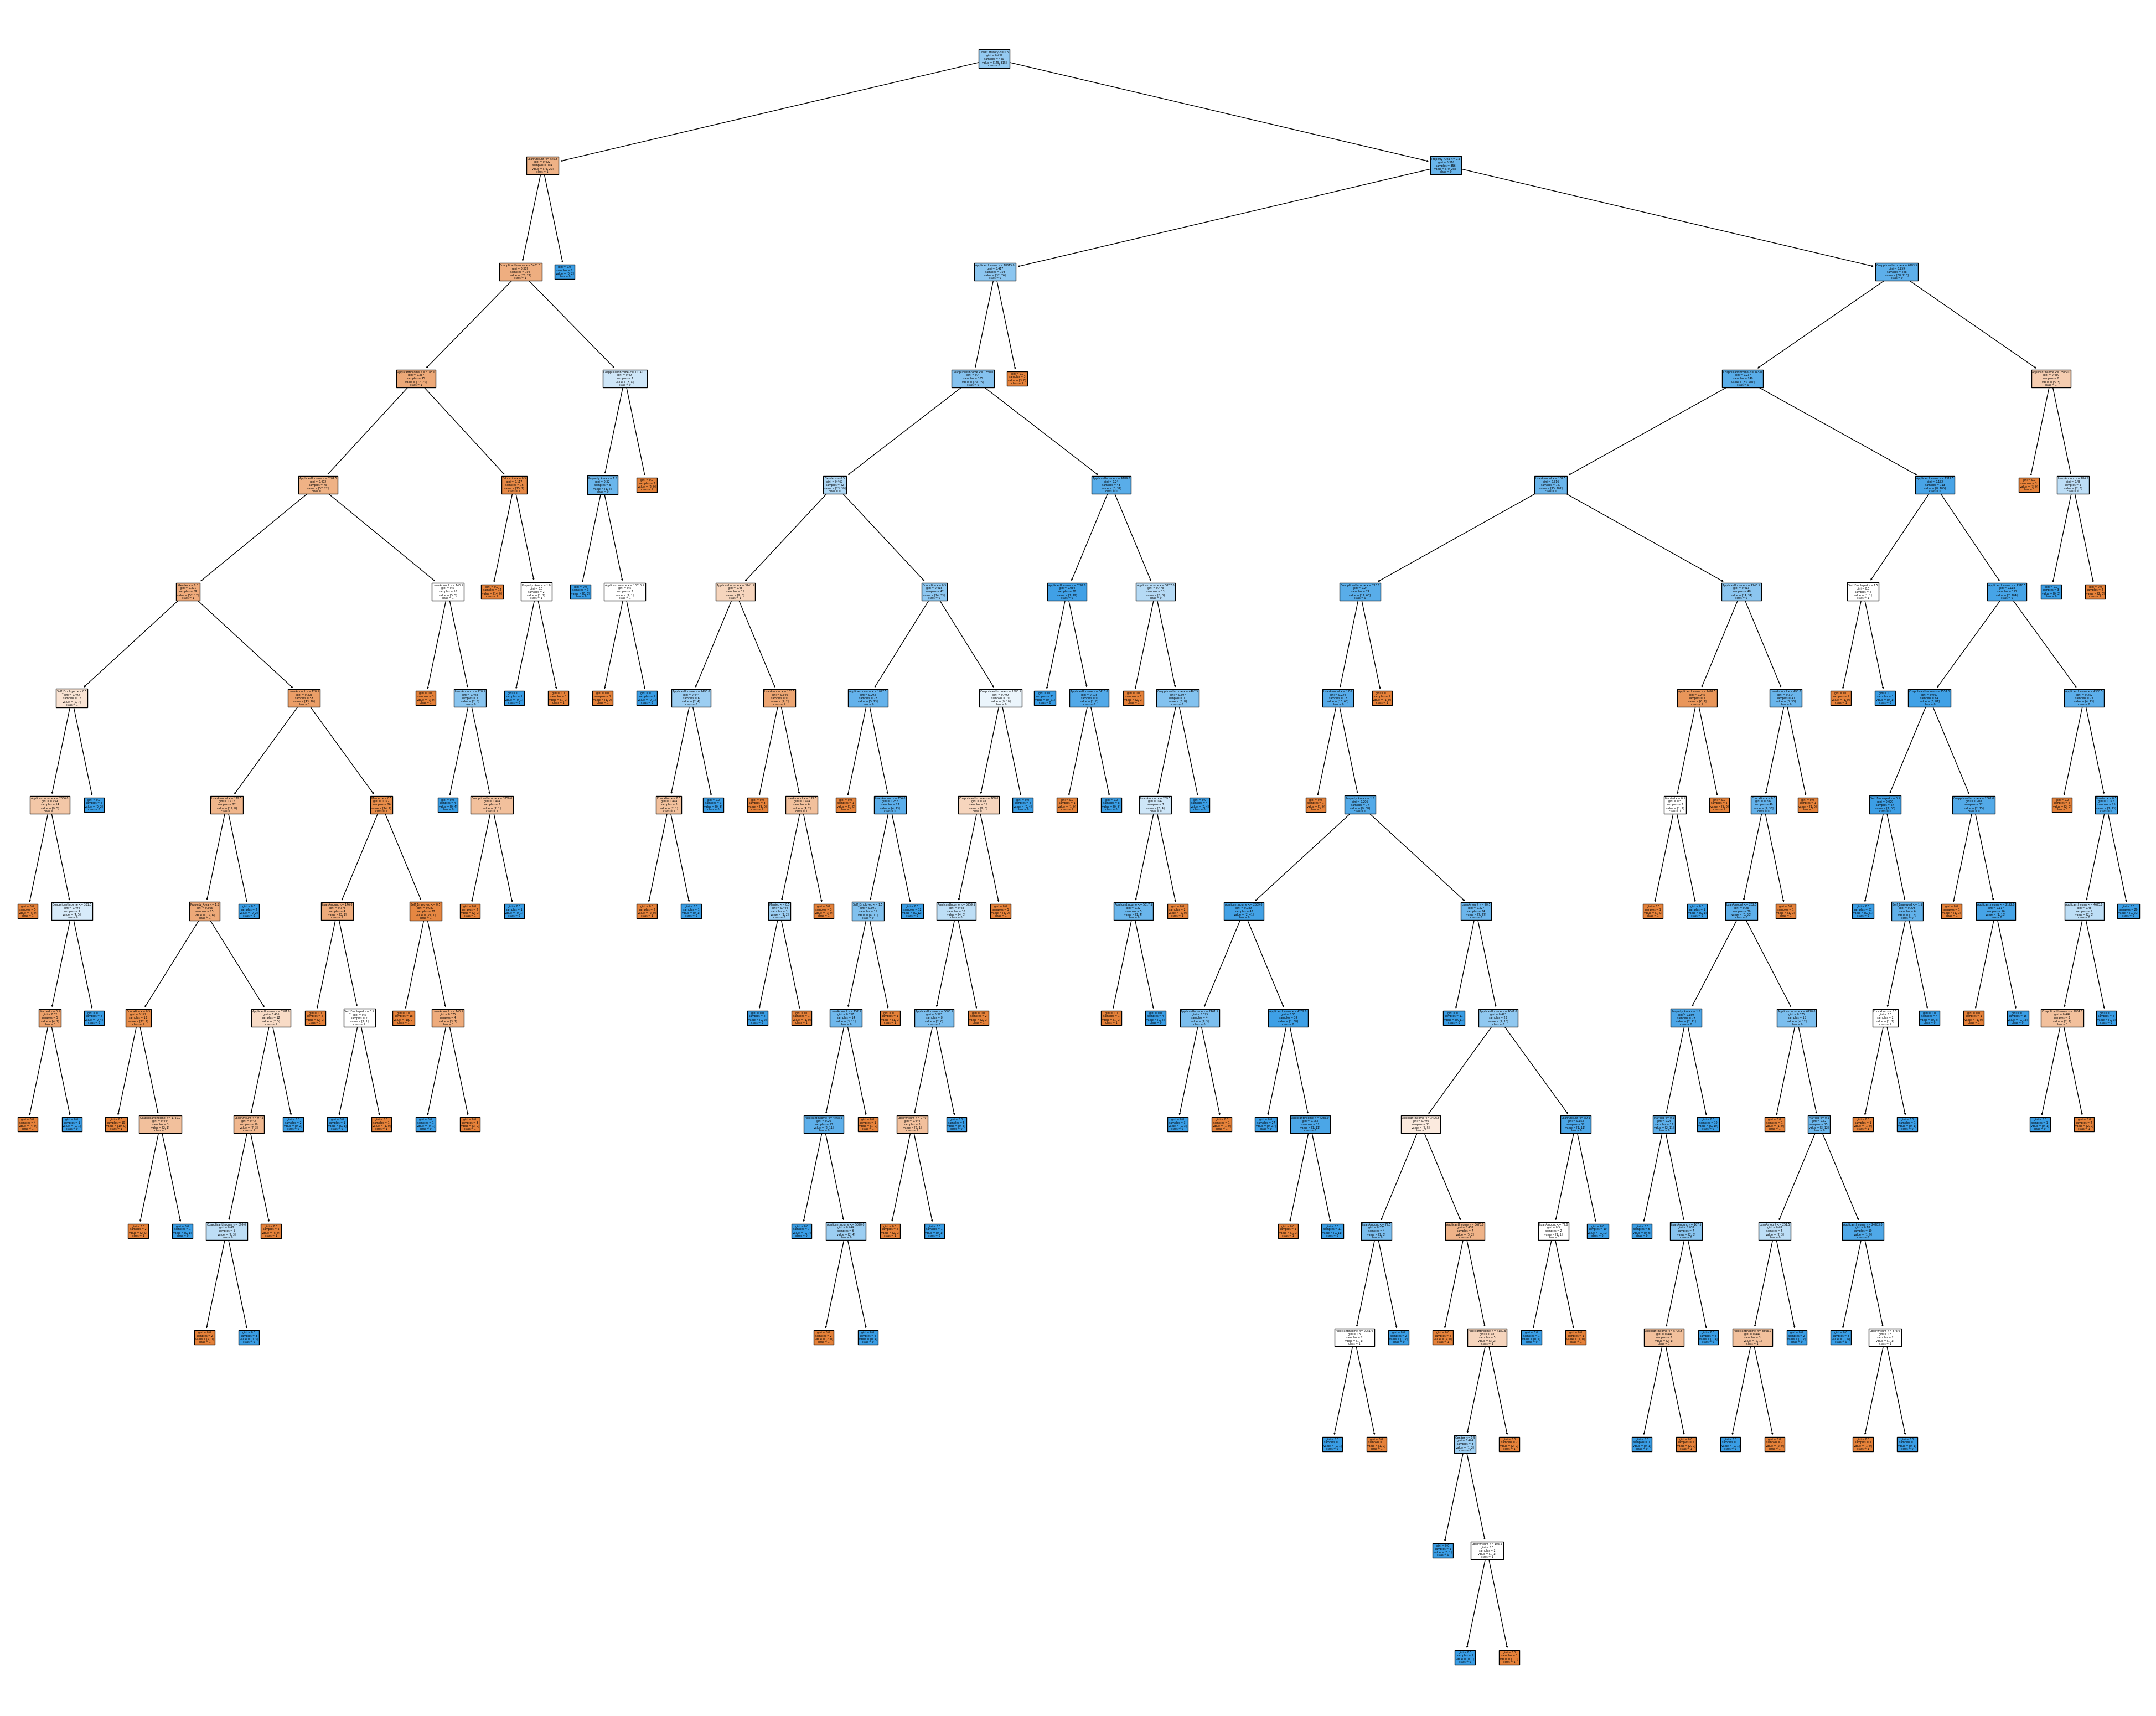

In [88]:
from sklearn import tree
class_names = list(map(str, Y.unique()))

fig = plt.figure(figsize=(50, 40))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=class_names,
                   filled=True)

plt.show()